# **Polynomial Regression**

### Importing All Necessary Libraries

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math

### Data Framing

In [212]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [213]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe())

data shape: (159, 7)

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64 

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


### **Preprocessing**

Converting textual data into numerical

In [214]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Species_label'] = label_encoder.fit_transform(df['Species'])
print(df.head())

  Species  Weight  Length1  Length2  Length3   Height   Width  Species_label
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200              0
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056              0
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961              0
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555              0
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340              0


### Plotting heatmap between some columns to know their relationship

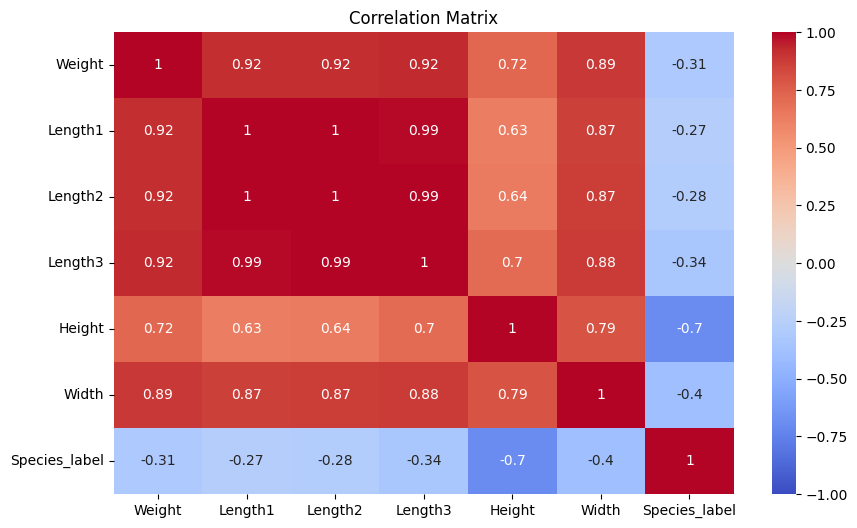

In [215]:
import seaborn as sns
plt.figure(figsize=(10, 6))
corr_matrix = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_label']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Saving processed data to CSV file

In [216]:
df.to_csv('Fish_processed_data.csv', index=False)

In [217]:
X = df[["Length1", "Length2", "Length3", "Height", "Width"]].values  
#.values is converting dataframe into array
print(X)
y = df[["Weight"]].values
print(y)     

[[23.2    25.4    30.     11.52    4.02  ]
 [24.     26.3    31.2    12.48    4.3056]
 [23.9    26.5    31.1    12.3778  4.6961]
 [26.3    29.     33.5    12.73    4.4555]
 [26.5    29.     34.     12.444   5.134 ]
 [26.8    29.7    34.7    13.6024  4.9274]
 [26.8    29.7    34.5    14.1795  5.2785]
 [27.6    30.     35.     12.67    4.69  ]
 [27.6    30.     35.1    14.0049  4.8438]
 [28.5    30.7    36.2    14.2266  4.9594]
 [28.4    31.     36.2    14.2628  5.1042]
 [28.7    31.     36.2    14.3714  4.8146]
 [29.1    31.5    36.4    13.7592  4.368 ]
 [29.5    32.     37.3    13.9129  5.0728]
 [29.4    32.     37.2    14.9544  5.1708]
 [29.4    32.     37.2    15.438   5.58  ]
 [30.4    33.     38.3    14.8604  5.2854]
 [30.4    33.     38.5    14.938   5.1975]
 [30.9    33.5    38.6    15.633   5.1338]
 [31.     33.5    38.7    14.4738  5.7276]
 [31.3    34.     39.5    15.1285  5.5695]
 [31.4    34.     39.2    15.9936  5.3704]
 [31.5    34.5    39.7    15.5227  5.2801]
 [31.8    3

### **Splitting Dataset**

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### **Training the Model**

In [219]:
from sklearn.pipeline import make_pipeline
# Polynomial transformation and model fitting
poly = PolynomialFeatures(degree=2)
model = make_pipeline(poly, LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### **Prediction**

Predicting the fish weight by giving an multiple inputs (Length1, Length2, Length3, Height, Width)

In [220]:
y_pred = model.predict(X_test)
#Comparison
print('- y_pred : ')
print(y_pred)

- y_pred : 
[[ 425.03305841]
 [ 123.15033393]
 [ 153.67721896]
 [ 149.64892293]
 [ 631.82440629]
 [ 897.05975652]
 [ 714.72389346]
 [ 336.63843596]
 [1160.97923099]
 [ 116.13286106]
 [ 212.21906542]
 [ 514.33877866]
 [ 811.88490512]
 [1149.37018766]
 [  56.93505445]
 [  89.3696305 ]
 [ 140.01015289]
 [1441.69962032]
 [ 144.10207499]
 [ 728.85035818]
 [  60.21399598]
 [ 418.69294424]
 [ 129.04387388]
 [1702.279574  ]
 [  86.26385764]
 [ 457.99386624]
 [ 698.54883457]
 [ 242.14400642]
 [ 923.16814768]
 [  14.36348538]
 [ 619.8856589 ]
 [ 129.67663082]]


In [221]:
print('- y_test : ')
print(y_test)

- y_test : 
[[ 390. ]
 [   0. ]
 [ 170. ]
 [ 160. ]
 [ 556. ]
 [ 900. ]
 [ 800. ]
 [ 300. ]
 [ 975. ]
 [ 115. ]
 [ 200. ]
 [ 456. ]
 [1000. ]
 [1000. ]
 [  60. ]
 [  78. ]
 [ 145. ]
 [1600. ]
 [ 130. ]
 [ 720. ]
 [  55. ]
 [ 390. ]
 [ 120. ]
 [1650. ]
 [  90. ]
 [ 450. ]
 [ 700. ]
 [ 270. ]
 [ 850. ]
 [   9.7]
 [ 650. ]
 [ 110. ]]


### Plotting the regression line for necessary columns

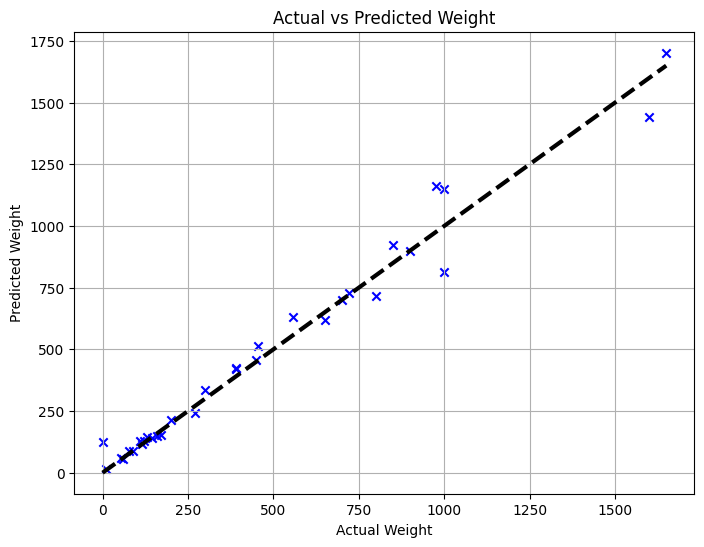

In [222]:
# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.grid()
plt.show()

### Calculating Mean Absolute Error (MAE), Mean Squared Error (MSE) and R-squared value

In [223]:
# Evaluate model performance if needed
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5114.711505214007
